In [2]:
"""
Created on Thu Mar 22 12:19:06 2018
@author: BIA-660 Team 2
Code for scrapping questions and answers from stackoverflow
Scrapoing dynamic content : Selenium
Scrapping static contetnt : Beautiful soup
""" 
#packages for scrapping
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.keys import Keys
import csv
import requests
from bs4 import BeautifulSoup
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
import numpy as np
import pandas as pd

#packages for analysing
# Importing librarys
import itertools
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# import method to calculate metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
import warnings
warnings.filterwarnings('ignore')
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics.pairwise import linear_kernel

Starting classification and analysis..

Top 10 labels found from the database and their occurances :

{'python': [4883], 'python-3.x': [618], 'pandas': [565], 'django': [308], 'nlp': [249], 'artificial-intelligence': [248], 'numpy': [237], 'python-2.7': [187], 'java': [186], 'tensorflow': [182]}

Classification report for Gaussian Naive Bayes

                         precision    recall  f1-score   support

artificial-intelligence       0.27      0.65      0.38        43
                 django       0.16      0.52      0.24        62
                   java       0.08      0.38      0.13        34
                    nlp       0.15      0.48      0.23        48
                  numpy       0.06      0.32      0.10        41
                 pandas       0.22      0.76      0.34       123
                 python       0.95      0.54      0.69       995
             python-2.7       0.03      0.21      0.06        39
             python-3.x       0.11      0.62      0.19       117
   

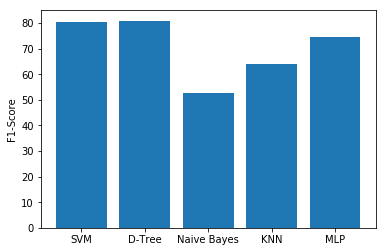

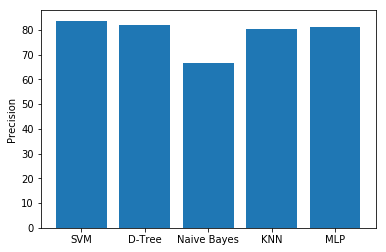

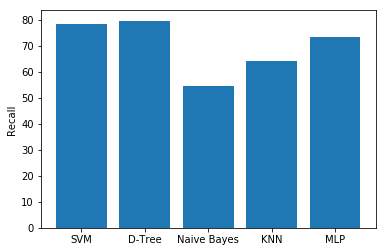


Enter a question
implement neural network in python pandas

Using classification models for prediction


The predicted label for the asked question is ['pandas', 'python']

 Top 3  matching questions:


1.test neural network imag tensorflow


2.doubt neural network python code


3.python neural network weight matrix updat work

time taken for classification model to classify and get relevant results : 0.06504607200622559 milliseconds
Select 1 most relevant question
1

Answer for the selected question is

nan

Using no classification models 


 Top 3  matching questions:


1.neural network id


2.neural network artifici intellig


3.test neural network imag tensorflow

time taken without classification to get relevant questions : 0.07104730606079102 milliseconds
Select 1 most relevant question
1

Answer for the selected question is

'It seems like you\'re asking the problem:Will this algorithm help me, reliably, detect when an "intrusion" has happened.Looking at some of thecriticism of

In [7]:
#----------------------Web scrapping and Data synthesis----------------------
#Required column attributes
columns = ['id','question','question_date','question_desc','answer','answer_date','score','postedby','views','subtags','url']

class Review(object):
    
    def __init__(self):
        self.question =""
        self.question_date = ""
        self.question_desc = ""
        self.answer = ""
        self.answer_date = ""
        self.score = 0
        self.postedby = ""
        self.views = ""
        self.subtags = []
        self.url = ""
    
    def to_dict(self):  
        return {
        'question' :self.question,
        'question_date' :self.question_date ,
        "question_desc": self.question_desc,
        'answer': self.answer ,
        'answer_date': self.answer_date ,
        'score' : self.score ,
        'postedby': self.postedby ,
        'views': self.views  ,
        'subtags': self.subtags,
        'url': self.url
        }
    


def tokenize_stem(paragraph):
    
    stop_words = stopwords.words('english')
    porter_stemmer = PorterStemmer()
    
    sentences = nltk.sent_tokenize(paragraph)
    
    for i in range(0,len(sentences)):
        sentences[i] =' '.join([porter_stemmer.stem(token) for token in nltk.word_tokenize(sentences[i].strip().lower()) if token.strip() not in stop_words and token.strip() not in string.punctuation])
    
    return '.'.join(sentences)

def get_doc_tokens(doc,normalize):
    
    # gets the stop_words
    stop_words = stopwords.words('english')
    porter_stemmer = PorterStemmer()
    if normalize=="stem":
        tokens=[porter_stemmer.stem(token.strip())  for token in nltk.word_tokenize(doc.lower())  if token.strip() not in stop_words and                   token.strip() not in string.punctuation]
        
    else:
        tokens=[token.strip()  for token in nltk.word_tokenize(doc.lower()) if token.strip() not in stop_words and token.strip() not in string.punctuation]
        
    
    
    token_count={token:tokens.count(token) for token in set(tokens)}
    return token_count

def prettify_print(string):   
    soup_new = BeautifulSoup(string)
    tag = soup_new.p
    print(tag.string)


def scrape_write(csvfile):
    #initializing chrome driver
    driver = webdriver.Chrome(executable_path= 'C:/Users/Shreyas/Desktop/chromedriver_win32/chromedriver')

    driver.get("https://stackoverflow.com/")
    # Wait 20 seconds for page to load
    timeout = 20
    
    try:
        WebDriverWait(driver, timeout)
    except TimeoutException:
        print("Timed out waiting for page to load")
        driver.quit()
    
    topic = "artificial intelligence" 
    elem = driver.find_element_by_name("q")
    elem.clear()
    elem.send_keys(topic)
    elem.send_keys(Keys.RETURN)
    driver.find_element_by_xpath('//*[@title="show 50 items per page"]').click()
      
    with open(csvfile, 'w',encoding="utf-8",newline='',) as file:  
        writer = csv.DictWriter(file, fieldnames = columns, delimiter = ',')
        writer.writeheader()
        
        #getting tags into the list    
        while True:    
            links=[]
            list_links = driver.find_elements_by_tag_name('a')
            for i in list_links:
                links.append(i.get_attribute('href'))
        
            linksf=[]
            for i in range(0,len(links)):
                if type(links[i]) == str:
                    linksf.append(links[i])
        
        
            ml=[]
            for i in range (0,len(linksf)):
                tokens1=linksf[i].split("/")
                for j in tokens1:
                    if j == "questions":
                        ml.append(linksf[i])
        
        
            no_ques=[]
            for i in range (0,len(ml)):
                    tokens1=ml[i].split("/")
                    for j in tokens1:
                        if j != "tagged" and j == "stackoverflow.com":
                            no_ques.append(ml[i]) # I want
        
            no_ques2=[]
            for i in range (0,len(no_ques)):
                    tokens1=no_ques[i].split("/")
                    for j in tokens1:
                        if j == "tagged":
                            no_ques2.append(no_ques[i])
        
            final_url  = [x for x in no_ques if x not in no_ques2]
        
            no_ques3_final=[]
            for i in range (0,len(final_url)):
                    tokens1=final_url[i].split("/")
                    if len(tokens1) > 5:
                        no_ques3_final.append(final_url[i])
        
            for i in range (0,len(no_ques3_final)):    
                c=no_ques3_final[i]
                site = requests.get(c);
        
                if site.status_code is 200:
                    soup = BeautifulSoup(site.content, 'html.parser')
                
                    #find list of all associated tag links
                    tagLinks = soup.find(class_ = 'post-taglist').select('a')
                 
                    #instantiating the class
                    review = Review()
                
                    #populating review properties
                    review.question = tokenize_stem(soup.find(class_='question-hyperlink').get_text(strip=True))
                    review.question_desc = tokenize_stem(soup.find(class_='post-text').get_text(strip=True))       
                    review.url =   soup.find(class_='question-hyperlink').get('href').strip()
                    review.views = str(soup.find(class_='module question-stats').findAll('b')[1].get_text(strip=True)).replace('times','')
                    review.score = soup.find(class_='vote-count-post ').get_text(strip=True)
                    review.subtags  = [ tags.get_text() for tags  in tagLinks ]
                
                    review_anchor = (soup.find(class_ = 'user-details').find('a'))
                    if(review_anchor is not None ):
                        review.postedby = review_anchor.get_text()
                
                    review.question_date = (soup.find(class_ = 'user-action-time').select('span')[0])['title']
                
                    try:
                        review.answer = soup.find("div", class_="answercell post-layout--right").find("div", class_="post-text").get_text(strip=True)
                        if len(review.answer.strip()) == 0:
                            continue
                        review.answer_date = (soup.find("div", class_="answercell post-layout--right").find("div", class_="user-action-time").select('span')[0])['title']
                    except:
                        pass
                    writer.writerow(review.to_dict())
                    
            #find next button        
            try:
                next_pagebutton = driver.find_element_by_xpath('//*[@rel="next"]')            
                next_pagebutton.click()                
                #wait for 10 seconds for page to load
                time.sleep(10)
                continue
            except:        
                #break the while loop after all the entries have been appended    
                break

#----------------------Data Classification and Analysis----------------------

def classify_and_visualize():
    print("Starting classification and analysis..")
    
    # Importing dataset: Preprocessing data
    data = pd.read_csv("so-reviews.csv", header = 0)
    tags = pd.DataFrame(data.iloc[:,9])
    ques = pd.DataFrame(data.iloc[:,1])
    answer_raw = (pd.DataFrame(data.iloc[:,4])).values.tolist()
    
    # Cleaning subtags to have proper words
    tags['subtags'] = tags['subtags'].astype(str).str.replace('[', '')
    tags['subtags'] = tags['subtags'].astype(str).str.replace(']', '')
    tags['subtags'] = tags['subtags'].astype(str).str.replace("'", '')
    
    # Extract values and convert into list
    ques = ques.values.tolist()
    tags = tags.values.tolist()
    quess=[]
    quess_tags=[]
    
    # Convert from list in list to list
    for i in range(len(ques)):
        quess.append(' '.join(ques[i]).lower())
        quess_tags.append(' '.join(tags[i]).lower())
    
    #------------------------------------------------------------------------------
    # Top 10 tags
    classs = pd.DataFrame(quess_tags)
    clas = classs.values.tolist()
    
    clas_1 = []
    for i in range(len(quess_tags)):
        clas_1.append(clas[i][0].split(',')) 
    for i in range(0,len(clas_1)):
        for j in range(0,len(clas_1[i])):
            clas_1[i][j] = clas_1[i][j].strip()
    
    rrr = list(itertools.chain.from_iterable(clas_1))
    
    n10=[]
    c = Counter(d for d in rrr)
    n10.append(c.most_common(10))
    n100 = list(itertools.chain.from_iterable(n10))
    
    
    def Convert(tup, di):
        for a, b in tup:
            di.setdefault(a, []).append(b)
        return di
    
    dictionary1 = {}
    top_10_dict = (Convert(n100, dictionary1))
    print("\nTop 10 labels found from the database and their occurances :\n")
    print(top_10_dict)
    
    
    # Remove elements not in top10
    for k in range(0,500):
        for i in range(0,len(clas_1)):
            for item in clas_1[i]:
                #print(item)
                if item in top_10_dict.keys():
                    pass
                else:
                    clas_1[i].remove(item)            
                   
    # Fitting the multilabel binarizer to extract the classes.
    mlb = preprocessing.MultiLabelBinarizer()
    
    # Tranforming the tags.
    Y=mlb.fit_transform(clas_1)
    
    # check size of indicator matrix
    Y.shape
    
    # Split 80% for training and 20% testing.
    X_train, X_test, Y_train, Y_test = train_test_split(quess, Y, test_size=0.20, shuffle=True, random_state=0)
    
    ###########################################################################################################


    # Model fitting: Gaussian Naive Bayes
    classifier = Pipeline([('tfidf', TfidfVectorizer(min_df=5)),('clf', BinaryRelevance(GaussianNB()))])
    classifier.fit(X_train, Y_train)
    predicted = classifier.predict(X_test)
    print("\nClassification report for Gaussian Naive Bayes\n")
    print(classification_report(Y_test, predicted, target_names=mlb.classes_))
    accuracy_score(Y_test,predicted)
    precision2,recall2,fscore2,support = score(Y_test,predicted,average='weighted')
    fscore2

    ###########################################################################################################

    # Model fitting: K Nearest Neighbour CLassifier

    classifier = Pipeline([('tfidf', TfidfVectorizer(min_df=5)),('clf', KNeighborsClassifier(n_neighbors=10))])
    classifier.fit(X_train, Y_train)
    predicted = classifier.predict(X_test)
    print("\nClassification report for K Nearest Neighbour CLassifier\n")
    print(classification_report(Y_test, predicted, target_names=mlb.classes_))
    accuracy_score(Y_test,predicted)
    precision3,recall3,fscore3,support = score(Y_test,predicted,average='weighted')
    fscore3

    ###########################################################################################################

    # Model fitting: MLP Classifier
    classifier = Pipeline([('tfidf', TfidfVectorizer(min_df=5)),('clf', MLPClassifier(alpha=1))])
    classifier.fit(X_train, Y_train)
    predicted = classifier.predict(X_test)
    print("\nClassification report for MLP Classifier\n")
    print(classification_report(Y_test, predicted, target_names=mlb.classes_))
    accuracy_score(Y_test,predicted)
    precision4,recall4,fscore4,support = score(Y_test,predicted,average='weighted')
    fscore4

    ###########################################################################################################

    # Model fitting: Decision tree
    classifier = Pipeline([('tfidf', TfidfVectorizer(min_df=5)),('clf', DecisionTreeClassifier())])
    classifier.fit(X_train, Y_train)
    predicted = classifier.predict(X_test)
    print("\nClassification report for Decision tree\n")
    print(classification_report(Y_test, predicted, target_names=mlb.classes_))
    accuracy_score(Y_test,predicted)
    precision1,recall1,fscore1,support = score(Y_test,predicted,average='weighted')
    fscore1
    ###########################################################################################################
    # Model fitting: Support Vector Classifier and checking the classification report.
    classifier = Pipeline([('tfidf', TfidfVectorizer(min_df=5)),('clf', OneVsRestClassifier(LinearSVC()))])
    classifier.fit(X_train, Y_train)
    predicted = classifier.predict(X_test)
    print("\nClassification report for Support Vector Classifier\n")
    print(classification_report(Y_test, predicted, target_names=mlb.classes_))
    accuracy_score(Y_test,predicted)
    precision,recall,fscore,support = score(Y_test,predicted,average='weighted')
    fscore

    ###########################################################################################################
    # Plot F1 score for every model

    abc2 = {"SVM":fscore*100, "D-Tree":fscore1*100,  "Naive Bayes":fscore2*100, "KNN":fscore3*100, "MLP":fscore4*100}
    D = abc2
    plt.bar(range(len(D)), D.values(), align='center')
    plt.xticks(range(len(D)), D.keys())
    plt.ylabel("F1-Score")
    plt.show()

    ###########################################################################################################

    # Plot Precision score for every model

    abc1 = {"SVM":precision*100, "D-Tree":precision1*100,  "Naive Bayes":precision2*100, "KNN":precision3*100, "MLP":precision4*100}
    e = abc1
    plt.bar(range(len(e)), e.values(), align='center')
    plt.xticks(range(len(e)), e.keys())
    plt.ylabel("Precision")
    plt.show()

    ###########################################################################################################

    # Plot Recall score for every model

    abc3 = {"SVM":recall*100, "D-Tree":recall1*100,  "Naive Bayes":recall2*100, "KNN":recall3*100, "MLP":recall4*100}
    f = abc3
    plt.bar(range(len(f)), f.values(), align='center')
    plt.xticks(range(len(f)), f.keys())
    plt.ylabel("Recall")
    plt.show()
    ###########################################################################################################
    #find a similar questions , to the entered answer
    while(True):
        
        detected_labels = []
        user_question = input("\nEnter a question\n")
        
        #predict the labels that apply to the asked question
        #as SVM has the best performance, we predict our labels using it.
        print("\nUsing classification models for prediction\n")
        start_model = time.time()
        predicted = classifier.predict([user_question])
        
        #predicted variable is a tuple of predicted classes
        for tup in (mlb.inverse_transform(predicted)[0]):
            detected_labels.append(tup)
                 
        print("\nThe predicted label for the asked question is {}".format(detected_labels))   
        
            
        list_filteredquestions= []
        list_filteredanswers = []
        #find relevant list of question having the found tag
        for i in range(0,len(quess_tags)):
            for tag in detected_labels:
                if tag in quess_tags[i]:
                    #if a tag is found in the list of tags, append that question
                    list_filteredquestions.append(quess[i])
                    list_filteredanswers.append(answer_raw[i])
                    break
                           
        #stem the user asked question
        user_question = tokenize_stem(user_question.strip())
        
        #append user asked question as the last element
        list_filteredquestions.append(user_question)
    
        #generate tf-idf matrix
        tfidf = TfidfVectorizer().fit_transform(list_filteredquestions)
        
        #find the cosine sim
        cosine_similarities = linear_kernel(tfidf[-1], tfidf).flatten()
        cosine_similarities = cosine_similarities.argsort()[::-1]
        
        #return top 3 most similar questions
        print("\n Top 3  matching questions:\n")
        #Serial number : Question
        dict_foundquestions = {}
        #index : question
        dict_foundanswerindex = {}
        

       
        for i in range(1,4):
            similar_index = cosine_similarities[i]
            dict_foundquestions[i] = list_filteredquestions[similar_index]
            dict_foundanswerindex[i] = list_filteredanswers[similar_index]
            print("\n{}.{}\n".format(i,dict_foundquestions[i]))
         
        stop_model = time.time()    
        print("time taken for classification model to classify and get relevant results : {} milliseconds".format(stop_model-start_model))
        user_selectedQuestion = int(input("Select 1 most relevant question\n"))
        
        
        print("\nAnswer for the selected question is\n")
        prettify_print(str(dict_foundanswerindex[user_selectedQuestion]).replace("[","").replace("]",""))
        
        #########################################################################################################################
        
        print("\nUsing no classification models \n")
        
        start = time.time()
        quess_copy = quess.copy()
        quess_copy.append(user_question)
        
        tfidf = TfidfVectorizer().fit_transform(quess_copy)
        
        #find the cosine sim
        cosine_similarities = linear_kernel(tfidf[-1], tfidf).flatten()
        cosine_similarities = cosine_similarities.argsort()[::-1]
        
        #return top 3 most similar questions
        print("\n Top 3  matching questions:\n")
        #Serial number : Question
        dict_foundquestions = {}
        #index : question
        dict_foundanswerindex = {}
        
        for i in range(1,4):
            similar_index = cosine_similarities[i]
            dict_foundquestions[i] = quess[similar_index]
            dict_foundanswerindex[i] = answer_raw[similar_index]
            print("\n{}.{}\n".format(i,dict_foundquestions[i]))
         
        stop = time.time()
        print("time taken without classification to get relevant questions : {} milliseconds".format(stop-start))
        user_selectedQuestion = int(input("Select 1 most relevant question\n"))
        
        print("\nAnswer for the selected question is\n")
        prettify_print(str(dict_foundanswerindex[user_selectedQuestion]).replace("[","").replace("]",""))
        
        #########################################################################################################################
        user_continue = input("\nDo you wish to ask any more questions(y/n)??\n")     
        if user_continue == 'n' or user_continue == 'N':
            break
            
if __name__ == "__main__":  
    
    csvfilename = 'so-reviews.csv'
    #Uncomment to scrape data 
    #scrape_write(csvfilename)
    
    #Multilabel classification and Analysis
    classify_and_visualize()